<a href="https://colab.research.google.com/github/17092003vamsi/guner/blob/main/Random_Forest_12_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Validation Accuracy: 89.31%
Test Accuracy: 92.86%

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.96      0.96      0.96        50
           2       0.87      0.96      0.91        50
           3       0.96      0.96      0.96        45
           4       0.92      0.82      0.87        40
           5       0.88      0.88      0.88        49

    accuracy                           0.93       280
   macro avg       0.93      0.93      0.93       280
weighted avg       0.93      0.93      0.93       280



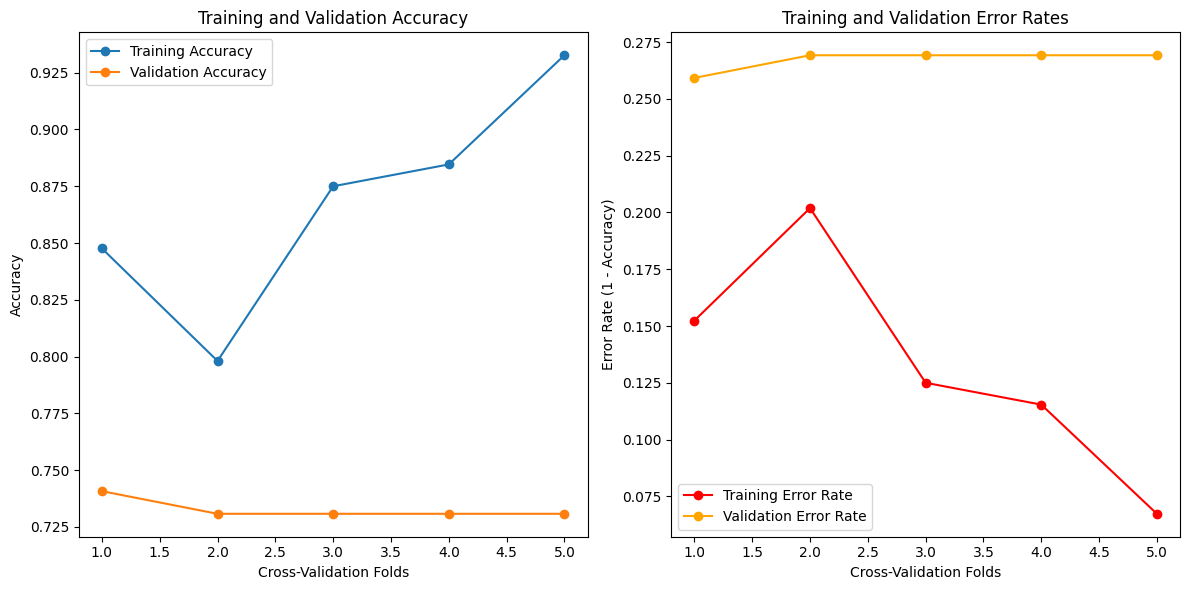

Class: A
  True Positives (TP): 45
  False Positives (FP): 0
  True Negatives (TN): 234
  False Negatives (FN): 1
------------------------------------------------
Class: A-S
  True Positives (TP): 48
  False Positives (FP): 2
  True Negatives (TN): 228
  False Negatives (FN): 2
------------------------------------------------
Class: G
  True Positives (TP): 48
  False Positives (FP): 7
  True Negatives (TN): 223
  False Negatives (FN): 2
------------------------------------------------
Class: G-S
  True Positives (TP): 43
  False Positives (FP): 2
  True Negatives (TN): 233
  False Negatives (FN): 2
------------------------------------------------
Class: HPM
  True Positives (TP): 33
  False Positives (FP): 3
  True Negatives (TN): 237
  False Negatives (FN): 7
------------------------------------------------
Class: HPM-S
  True Positives (TP): 43
  False Positives (FP): 6
  True Negatives (TN): 225
  False Negatives (FN): 6
------------------------------------------------


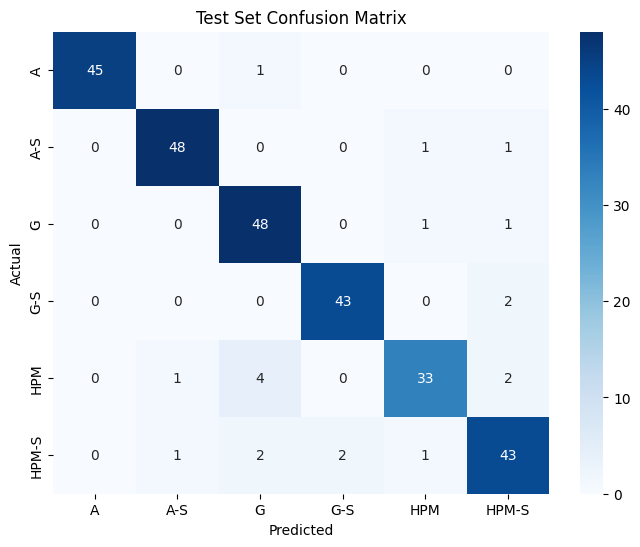

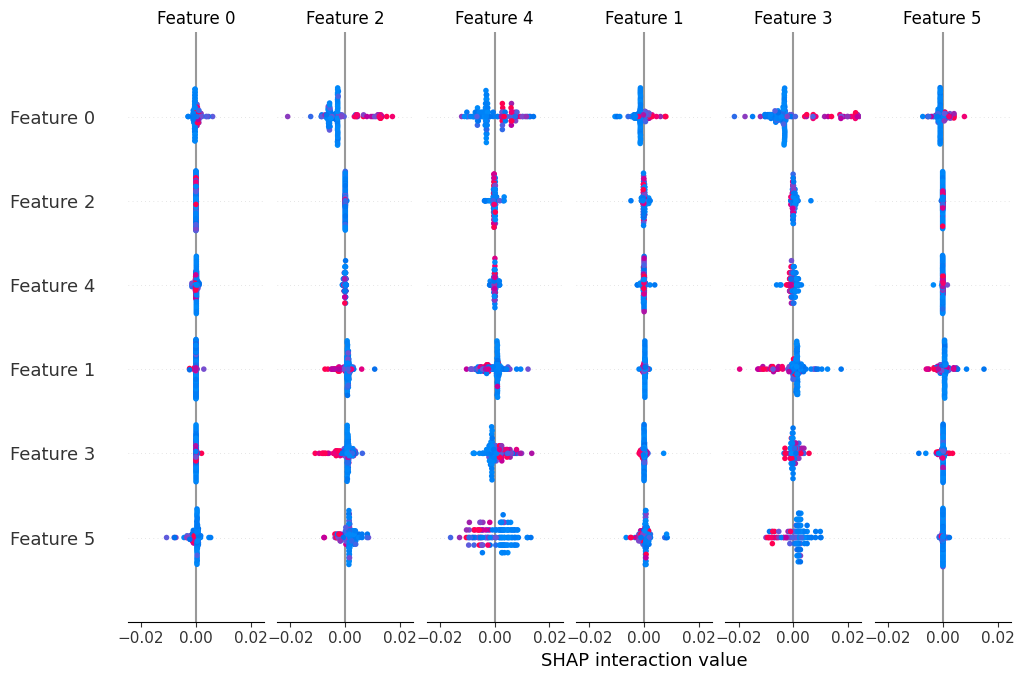

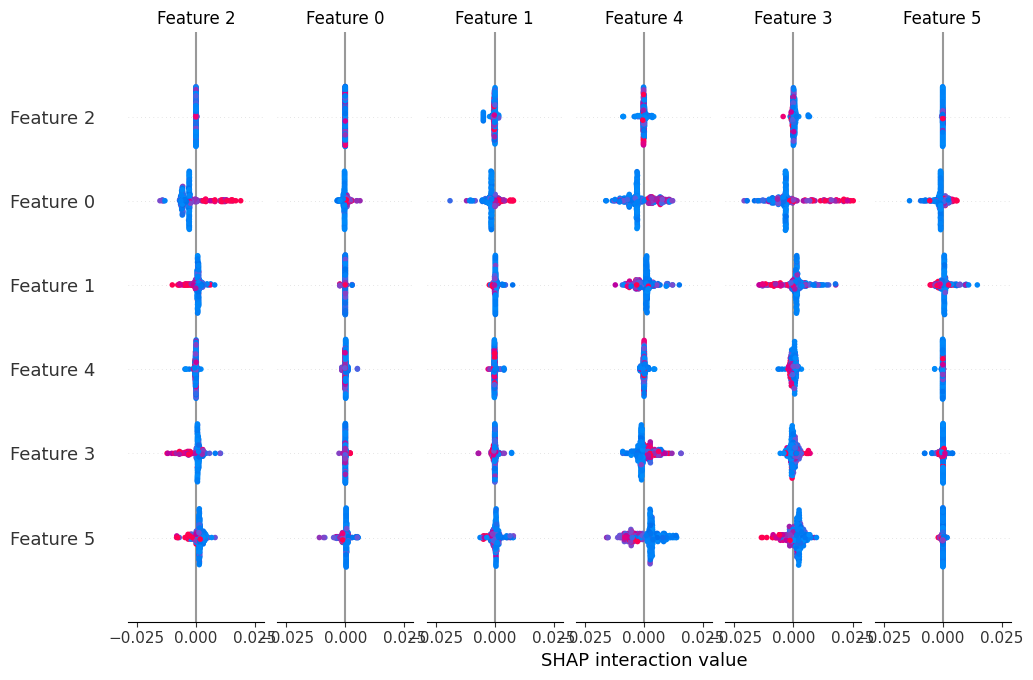

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import shap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'project 2 sap.csv'  # Path to your CSV file
data = pd.read_csv(file_path)

# Preprocessing: Encode labels and drop non-numeric columns
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Lable'])  # Encode the categorical 'Lable' column
X = data.drop(columns=['Type', 'Lable']).values  # Drop categorical columns 'Type' and 'Lable'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a validation set from the training data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_split, y_train_split)

# Predict on validation and test sets
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Accuracy on validation and test sets
val_accuracy = accuracy_score(y_val, y_pred_val)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Display validation and test accuracy
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Display the classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Plotting training & validation accuracy values
train_scores = cross_val_score(model, X_train_split, y_train_split, cv=5)
val_scores = cross_val_score(model, X_val, y_val, cv=5)

train_error_rates = 1 - train_scores
val_error_rates = 1 - val_scores
epochs = np.arange(1, len(train_scores) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_scores, label='Training Accuracy', marker='o')
plt.plot(epochs, val_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Cross-Validation Folds')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_error_rates, label='Training Error Rate', marker='o', color='red')
plt.plot(epochs, val_error_rates, label='Validation Error Rate', marker='o', color='orange')
plt.xlabel('Cross-Validation Folds')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.legend()
plt.title('Training and Validation Error Rates')

plt.tight_layout()
plt.show()

import numpy as np

# Confusion matrix based on the provided image
cm = np.array([[45, 0, 1, 0, 0, 0],
               [0, 48, 0, 0, 1, 1],
               [0, 0, 48, 0, 1, 1],
               [0, 0, 0, 43, 0, 2],
               [0, 1, 4, 0, 33, 2],
               [0, 1, 2, 2, 1, 43]])

class_labels = ['A', 'A-S', 'G', 'G-S', 'HPM', 'HPM-S']

# Function to calculate TP, FP, TN, FN for a specific class
def get_confusion_matrix_metrics(cm, class_index):
    TP = cm[class_index, class_index]  # True Positives
    FP = cm[:, class_index].sum() - TP  # False Positives
    TN = np.delete(np.delete(cm, class_index, 0), class_index, 1).sum()  # True Negatives
    FN = cm[class_index, :].sum() - TP  # False Negatives
    return TP, FP, TN, FN

# Loop through each class and compute metrics
for i, class_label in enumerate(class_labels):
    TP, FP, TN, FN = get_confusion_matrix_metrics(cm, i)
    print(f"Class: {class_label}")
    print(f"  True Positives (TP): {TP}")
    print(f"  False Positives (FP): {FP}")
    print(f"  True Negatives (TN): {TN}")
    print(f"  False Negatives (FN): {FN}")
    print("------------------------------------------------")

# Confusion matrix and classification report for the test set
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Test Set Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the validation set
shap_values_val = explainer.shap_values(X_val)
shap.summary_plot(shap_values_val, X_val, plot_type="bar")

# Calculate SHAP values for the test set
shap_values_test = explainer.shap_values(X_test)
shap.summary_plot(shap_values_test, X_test, plot_type="bar")
